# GLBL 5010 - Homework Assignment 1: Examining Convergence

This notebook:
- loads the dataset provided on Canvas
- constructs annualized GDP per capita growth from 1960-2000
- produces required summary stats and plots

**IMPORTANT**  
This notebook assumes csv file is in the same folder as this ipynb  

In [46]:
# Imports and formatting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

%matplotlib inline

In [47]:
# Load the csv

df = pd.read_csv("hwk1_convergence.csv", sep="\t") # separator argument added since dilineated by tabs by stata export
df.head()

,code,gdppc1960,gdppc2000,abslatitude,edu1960,region
0,AFG,NaN,NaN,0.37,16.88,Asia
1,AGO,NaN,2228.59,0.14,9.79,Sub-Saharan Africa
2,ALB,NaN,5315.43,NaN,90.20,Europe & Central Asia
3,ARE,NaN,111000.00,0.27,43.78,Middle East & North Africa
4,ARG,3211.93,14332.46,0.38,56.46,Americas


In [48]:
# inspect dataframe and make columns easier to read
df.info()
df.columns

COUNTRY = "code"
REGION = "region"
GDP1960 = "gdppc1960"
GDP2000 = "gdppc2000"
EDU1960 = "edu1960"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         174 non-null    object 
 1   gdppc1960    109 non-null    float64
 2   gdppc2000    160 non-null    float64
 3   abslatitude  155 non-null    float64
 4   edu1960      120 non-null    float64
 5   region       174 non-null    object 
dtypes: float64(4), object(2)
memory usage: 8.3+ KB


In [49]:
# data cleaning of the dataframe we got from the csv file

# converting to numeric columns, invlaid entries set to NaN so they are excluded from analysis
for c in [GDP1960, GDP2000, EDU1960]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Keep only relevant columns
d = df[[COUNTRY, REGION, GDP1960, GDP2000, EDU1960]].copy()

# Drop missing values
d = d.dropna()

# Logs require strictly positive values
d = d[(d[GDP1960] > 0) & (d[GDP2000] > 0)]

# Log GDP per capita in 1960
d["ln_gdppc_1960"] = np.log(d[GDP1960])

# Annualized GDPPC growth rate, 1960–2000
T = 40
d["g_ann"] = (d[GDP2000] / d[GDP1960])**(1/T) - 1

d.head()

,code,region,gdppc1960,gdppc2000,edu1960,ln_gdppc_1960,g_ann
4,ARG,Americas,3211.93,14332.46,56.46,8.07,0.04
9,BDI,Sub-Saharan Africa,754.99,747.83,2.60,6.63,-0.00
10,BEL,Europe & Central Asia,10628.08,33739.32,88.91,9.27,0.03
11,BEN,Sub-Saharan Africa,1780.01,1695.30,12.42,7.48,-0.00
12,BFA,Sub-Saharan Africa,977.47,1452.54,2.48,6.88,0.01


# Q1: Histogram of annualized GDP per capita growth rates (1960–2000)

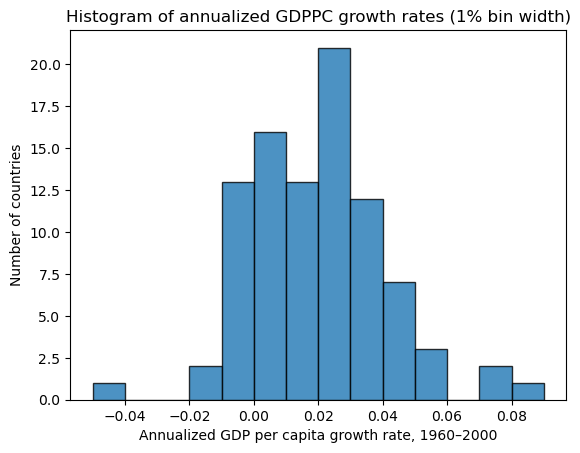

In [50]:

# Use the annualized growth rate variable "g_ann", which is in DECIMAL units:
# ex: 0.02 = 2% annual growth.
# The assignment asks for bin widths of 1 percentage point (1%).
# Since 1% = 0.01 in decimal units, we set bin_width = 0.01.

bin_width = 0.01

# Determine min/max growth rates to build a bin sequence that covers the full range
gmin, gmax = d["g_ann"].min(), d["g_ann"].max()

# Create evenly spaced histogram bins with width = 0.01 (1 percentage point)
# We use floor/ceil so the first/last bin boundaries are round values.
bins = np.arange(
    np.floor(gmin / bin_width) * bin_width,
    np.ceil(gmax / bin_width) * bin_width + bin_width,
    bin_width
)

# Plot histogram
plt.figure()
plt.hist(
    d["g_ann"],
    bins=bins,
    edgecolor="black",   # outlines around each bar
    linewidth=1,         # thickness of outlines
    alpha=0.8            # slight transparency for readability
)

# Label axes clearly for the visualization
plt.xlabel("Annualized GDP per capita growth rate, 1960–2000")
plt.ylabel("Number of countries")
plt.title("Histogram of annualized GDPPC growth rates (1% bin width)")

plt.show()

# Q2: Percentiles

In [51]:
percentiles = d["g_ann"].quantile([0.10, 0.25, 0.50, 0.75, 0.90])

# Convert from decimal to percent and round to 2 decimals (as instructed in the assignment)
(percentiles * 100).round(2)

0.10   -0.46
0.25    0.56
0.50    2.01
0.75    3.24
0.90    4.55
Name: g_ann, dtype: float64

### Distribution of Annualized GDP per Capita Growth Rates (1960–2000)

The table above reports selected percentiles of the annualized GDP per capita growth rate distribution across countries between 1960 and 2000.

The **10th percentile** of the growth rates is approximately **−0.46 percent**, indicating that the bottom decile of countries experienced declining GDP per capita over the period. The **25th percentile** is **0.56 percent**, suggesting that a substantial share of countries grew very slowly during these four decades.

The **50th percentile** annualized rate is approximately **2.01 percent**. The **75th percentile** is **3.24 percent**, while the **90th percentile** reaches **4.55 percent**, these reflect a subset of countries that achieved rapid long-run growth.


# Q3: GDPPC Highest and Lowest Rates

In [52]:
# Identify the 3 countries with the highest and lowest annualized growth
# Sort by g_ann" and take the top 3 and bottom 3.

top3 = (
    d.sort_values("g_ann", ascending=False)
     [[COUNTRY, "g_ann"]]
     .head(3)
     .assign(growth_pct=lambda x: (x["g_ann"] * 100).round(2))  # convert to percent units
)

bottom3 = (
    d.sort_values("g_ann", ascending=True)
     [[COUNTRY, "g_ann"]]
     .head(3)
     .assign(growth_pct=lambda x: (x["g_ann"] * 100).round(2))
)

# Display both tables
top3, bottom3

(    code  g_ann  growth_pct
 103  MLT   0.09        8.85
 24   BWA   0.08        7.98
 85   KOR   0.08        7.75,
     code  g_ann  growth_pct
 32   COD  -0.04       -4.16
 115  NGA  -0.02       -1.87
 114  NER  -0.02       -1.64)

### Highest and Lowest GDP per Capita Growth Rates (1960–2000)

The table above reports the **three countries with the highest** and **three countries with the lowest** annualized GDP per capita growth rates over the 1960–2000 period.

**Highest-growth countries (top three).**  
The top three performers in the sample are **Malta (MLT)**, **Botswana (BWA)**, and **South Korea (KOR)**. Malta experienced the fastest growth, with an average annual GDP per capita growth rate of approximately **8.85 percent**, followed closely by Botswana and South Korea at **7.98 percent per year** and **7.75 percent per year**. 

**Lowest-growth countries (bottom three).**  
The bottom three performers are **the Democratic Republic of the Congo (COD)**, **Nigeria (NGA)**, and **Niger (NER)**. The Democratic Republic of the Congo experienced the poorest performance, with an average annual GDP per capita growth rate of approximately **−4.16 percent**, while Nigeria and Niger recorded negative growth rates of roughly **−1.87 percent** and **−1.64 percent**, respectively.


# Q4: Plot countries’ growth rates against the 1960 (log) GDPPC.

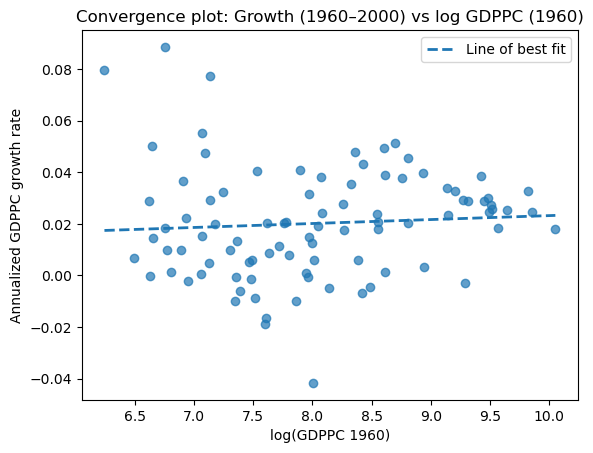

In [53]:
# Plot growth rates against 1960 log GDP per capita
# Line of best fit is added to summarize the overall relationship.

plt.figure()

# Scatter plot of the data
plt.scatter(d["ln_gdppc_1960"], d["g_ann"], alpha=0.7)

# Compute line of best fit using OLS
x = d["ln_gdppc_1960"]
y = d["g_ann"]

# Fit linear regression: growth on log initial GDP
coef = np.polyfit(x, y, 1)

# Create fitted values over the range of x
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = coef[0] * x_fit + coef[1]

# Plot best fit line
plt.plot(x_fit, y_fit, linestyle="--", linewidth=2, label="Line of best fit")

# Labels and title
plt.xlabel("log(GDPPC 1960)")
plt.ylabel("Annualized GDPPC growth rate")
plt.title("Convergence plot: Growth (1960–2000) vs log GDPPC (1960)")

plt.legend()
plt.show()

The convergence plot shows little evidence of unconditional convergence across countries between 1960 and 2000. While the relationship between initial GDP per capita and subsequent growth is weak, the fitted line of best fit is slightly positive, suggesting that richer countries did not systematically grow more slowly than poorer ones over this period. At the same time, there is substantial dispersion in growth outcomes among countries with similar initial income levels, indicating that initial income alone explains very little of long-run growth performance.

# Q5 Plot countries’ growth rates against the 1960 (log) GDPPC separately by region

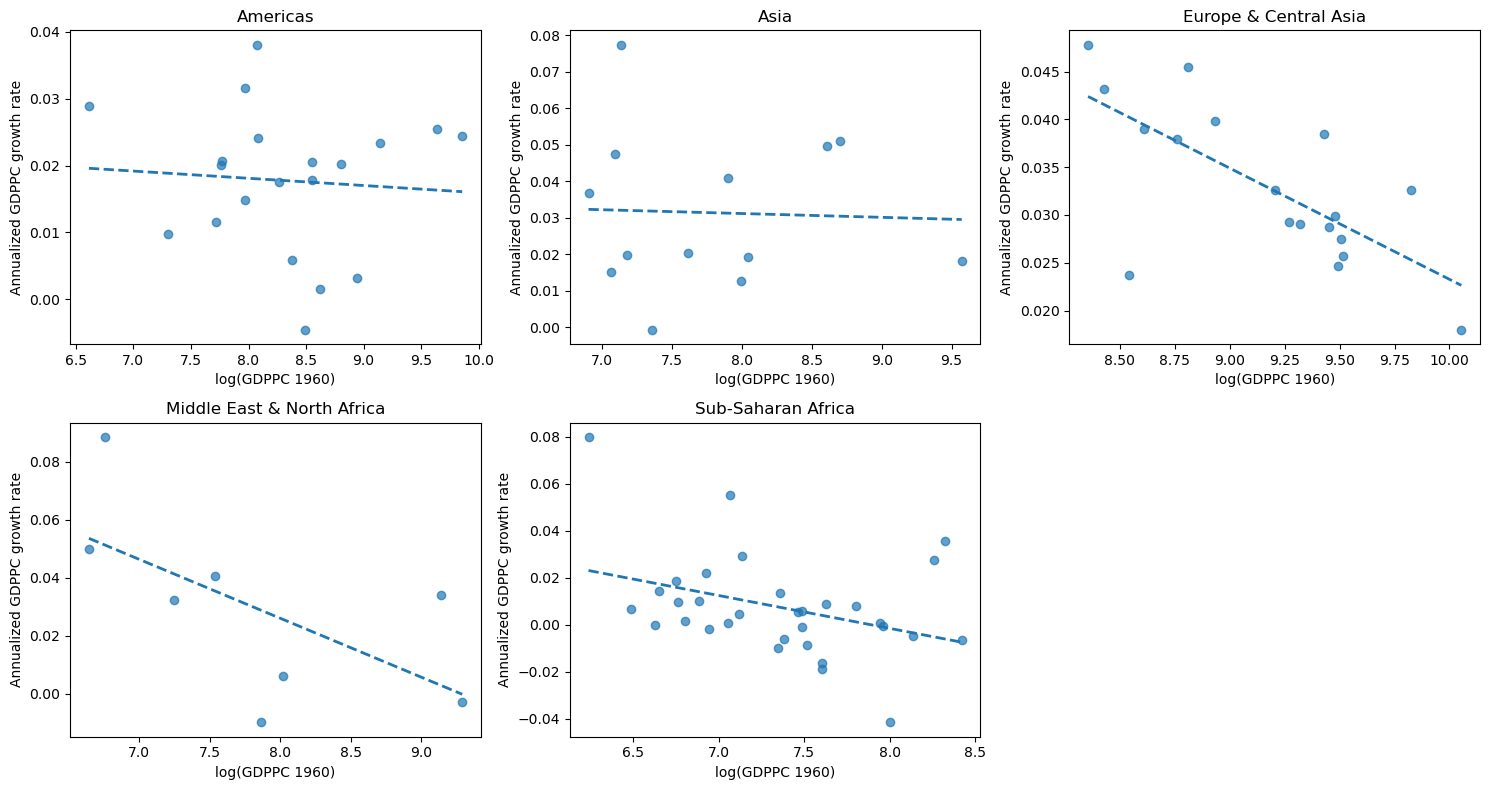

In [54]:
# Plot growth vs initial log GDPPC separately by region, so multiple scatter plots

regions = sorted(d[REGION].unique())

# Set up grid layout (3 plots per row is usually readable)
cols = 3
rows = int(np.ceil(len(regions) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), squeeze=False)

for i, r in enumerate(regions):
    ax = axes[i // cols][i % cols]
    dr = d[d[REGION] == r]  # subset for this region

    # Scatter plot for this region
    ax.scatter(dr["ln_gdppc_1960"], dr["g_ann"], alpha=0.7)

    # Add line of best fit if the region has enough observations
    if len(dr) >= 2:
        x = dr["ln_gdppc_1960"]
        y = dr["g_ann"]

        coef = np.polyfit(x, y, 1)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = coef[0] * x_fit + coef[1]

        ax.plot(x_fit, y_fit, linestyle="--", linewidth=2)

    # Axis labels and title
    ax.set_title(str(r))
    ax.set_xlabel("log(GDPPC 1960)")
    ax.set_ylabel("Annualized GDPPC growth rate")

# Turn off any unused panels (in case rows*cols > number of regions)
for j in range(len(regions), rows * cols):
    axes[j // cols][j % cols].axis("off")

plt.tight_layout()
plt.show()


The region-specific plots show that the relationship between initial income and subsequent growth differs noticeably across regions. In some regions, there is a clear negative relationship between initial log GDP per capita in 1960 and growth from 1960 to 2000, suggesting that poorer countries tended to grow faster than richer ones. This pattern is most visible in regions such as MENA and Europe and Central Asia, where several initially lower-income countries experienced relatively strong growth over the period.

In other regions, however, the relationship between initial income and growth is much weaker. In Asia, growth rates are generally low across a wide range of initial income levels, with little evidence that poorer countries consistently grew faster than richer ones. This indicates limited convergence within the region. Regions such as the Americas also show substantial variation in growth outcomes, with no clear or uniform convergence pattern across countries.

Overall, these plots suggest that convergence is not uniform across the world and certainly not across regions.

# Q6: Partition countries into four quartiles of their 1960 secondary school enrollment

In [55]:
# Partition countries into quartiles of 1960 secondary enrollment
# Splits countries into four groups based on edu1960.
# Use pd.qcut to create quartiles with approximately equal numbers of countries per group.
#
# Quartiles are labeled as 1 (lowest education) to 4 (highest education).

d["edu1960_q"] = pd.qcut(d[EDU1960], q=4, labels=[1, 2, 3, 4])

# sanity check for how many countries are in each quartile?
d["edu1960_q"].value_counts().sort_index()


edu1960_q
1    23
2    23
3    22
4    23
Name: count, dtype: int64

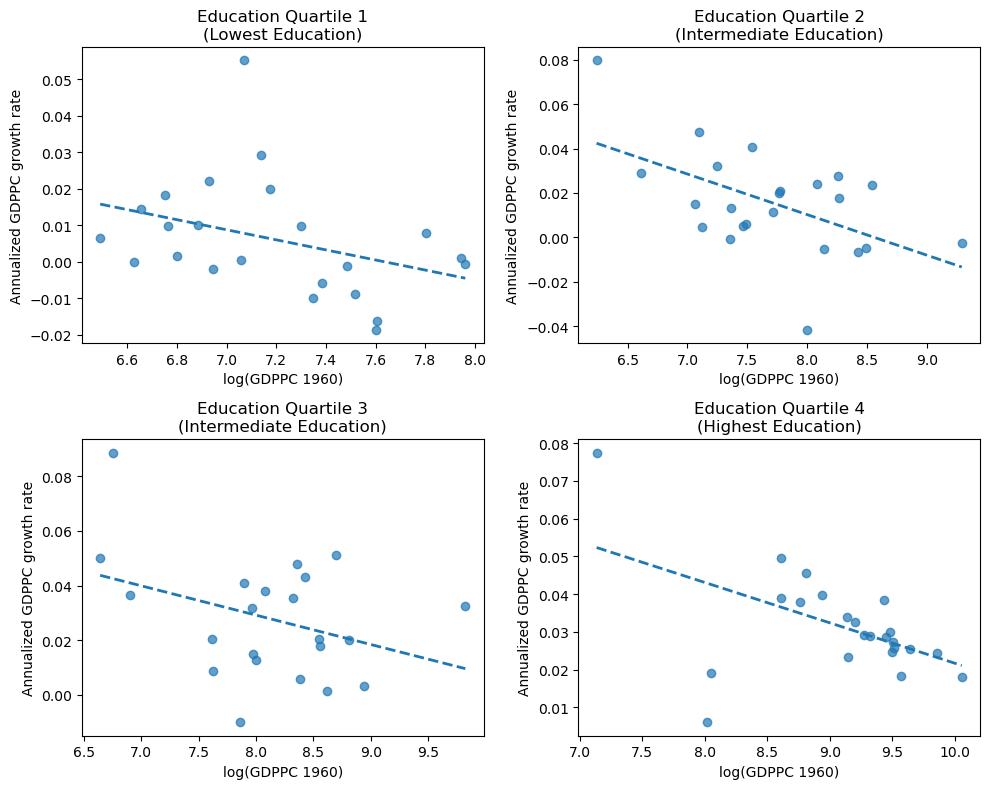

In [56]:
# Plot growth vs initial log GDPPC by education quartile
# Quartiles are labeled via the following....
#   1 = lowest secondary school enrollment in 1960
#   4 = highest secondary school enrollment in 1960

fig, axes = plt.subplots(2, 2, figsize=(10, 8), squeeze=False)

for q in [1, 2, 3, 4]:
    ax = axes[(q - 1) // 2][(q - 1) % 2]
    dq = d[d["edu1960_q"] == q]

    # Scatter plot
    ax.scatter(dq["ln_gdppc_1960"], dq["g_ann"], alpha=0.7)

    # Line of best fit (descriptive)
    if len(dq) >= 2:
        x = dq["ln_gdppc_1960"]
        y = dq["g_ann"]

        coef = np.polyfit(x, y, 1)
        x_fit = np.linspace(x.min(), x.max(), 100)
        y_fit = coef[0] * x_fit + coef[1]

        ax.plot(x_fit, y_fit, linestyle="--", linewidth=2)

    # Explicit, TA-friendly titles
    ax.set_title(
        f"Education Quartile {q}\n"
        f"({ 'Lowest' if q == 1 else 'Highest' if q == 4 else 'Intermediate' } Education)"
    )

    ax.set_xlabel("log(GDPPC 1960)")
    ax.set_ylabel("Annualized GDPPC growth rate")

plt.tight_layout()
plt.show()


### Growth, Initial Income, and Education Quartiles

The education-quartile plots show a negative relationship between initial GDP per capita and subsequent growth in all four quartiles, indicating that convergence is present regardless of initial levels of secondary school enrollment. The fitted lines are downward sloping across all quartiles. However, the slopes are broadly similar across quartiles, and there is substantial clustering in growth outcomes within each group. This indicates that while human capital may be related to growth performance, differences in convergence patterns across education quartiles are modest in this sample, and education alone does not fully explain variation in long-run growth.